<a href="https://colab.research.google.com/github/stephintoto/election-prediction/blob/main/election_bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [ ]:
US_STATES = [
    'alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado',
    'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho',
    'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine',
    'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi',
    'missouri', 'montana', 'nebraska', 'nevada', 'new-hampshire', 'new-jersey',
    'new-mexico', 'new-york', 'north-carolina', 'north-dakota', 'ohio',
    'oklahoma', 'oregon', 'pennsylvania', 'rhode-island', 'south-carolina',
    'south-dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia',
    'washington', 'west-virginia', 'wisconsin', 'wyoming', 'district-of-columbia'
]

In [ ]:
STATES_TO_FULL_NAMES = state_mapping = {
    'alabama': 'Alabama',
    'alaska': 'Alaska',
    'arizona': 'Arizona',
    'arkansas': 'Arkansas',
    'california': 'California',
    'colorado': 'Colorado',
    'connecticut': 'Connecticut',
    'delaware': 'Delaware',
    'florida': 'Florida',
    'georgia': 'Georgia',
    'hawaii': 'Hawaii',
    'idaho': 'Idaho',
    'illinois': 'Illinois',
    'indiana': 'Indiana',
    'iowa': 'Iowa',
    'kansas': 'Kansas',
    'kentucky': 'Kentucky',
    'louisiana': 'Louisiana',
    'maine': 'Maine',
    'maryland': 'Maryland',
    'massachusetts': 'Massachusetts',
    'michigan': 'Michigan',
    'minnesota': 'Minnesota',
    'mississippi': 'Mississippi',
    'missouri': 'Missouri',
    'montana': 'Montana',
    'nebraska': 'Nebraska',
    'nevada': 'Nevada',
    'new-hampshire': 'New Hampshire',
    'new-jersey': 'New Jersey',
    'new-mexico': 'New Mexico',
    'new-york': 'New York',
    'north-carolina': 'North Carolina',
    'north-dakota': 'North Dakota',
    'ohio': 'Ohio',
    'oklahoma': 'Oklahoma',
    'oregon': 'Oregon',
    'pennsylvania': 'Pennsylvania',
    'rhode-island': 'Rhode Island',
    'south-carolina': 'South Carolina',
    'south-dakota': 'South Dakota',
    'tennessee': 'Tennessee',
    'texas': 'Texas',
    'utah': 'Utah',
    'vermont': 'Vermont',
    'virginia': 'Virginia',
    'washington': 'Washington',
    'west-virginia': 'West Virginia',
    'wisconsin': 'Wisconsin',
    'wyoming': 'Wyoming',
    'district-of-columbia': 'District Of Columbia'
}


In [ ]:
# Reading the file content
with open('2020_election_results.txt', 'r') as file:
    text = file.read()

In [ ]:
# Regular expression pattern to match the required fields
pattern = (
    r"President:\s*(?P<state>[A-Za-z\s]+)\n"
    r"(?P<electoral_votes>\d+)\s*Electoral Votes\n"
    r"(?P<winner>Trump|Biden)\nPROJECTED WINNER\n\+ FOLLOW\n"
    r"Candidate\t%\t\tVotes\n(?:Trump|Biden)\n(?:\d+\.\d+%)?\s*\n?(?P<trump_votes>[\d,]+)\n(?:Trump|Biden)\n(?:\d+\.\d+%)?\s*\n?(?P<biden_votes>[\d,]+)"
)

In [ ]:
# Compile the regex pattern
regex = re.compile(pattern)

In [ ]:
# Find all matches in the text
matches = regex.findall(text)

In [ ]:
# Process the matches
results = []
for match in matches:
    state = match[0]
    electoral_votes = int(match[1])
    winner = match[2]
    trump_votes = int(match[3].replace(',', ''))
    biden_votes = int(match[4].replace(',', ''))

    # Append the extracted information to the results list
    results.append({
        "State": state,
        "Electoral Votes": electoral_votes,
        "Winner": winner,
        "Winner Votes": trump_votes,
        "Loser Votes": biden_votes,
    })

In [ ]:
voting_df = pd.DataFrame(results)

In [ ]:
voting_df['Trump Votes'] = voting_df.apply(lambda row: row['Winner Votes'] if row.Winner == 'Trump' else row['Loser Votes'], 1)
voting_df['Biden Votes'] = voting_df.apply(lambda row: row['Winner Votes'] if row.Winner == 'Biden' else row['Loser Votes'], 1)

In [ ]:
voting_df['Trump Electoral Votes'] = voting_df.apply(lambda row: row['Electoral Votes'] if row.Winner == 'Trump' else 0, 1)
voting_df['Biden Electoral Votes'] = voting_df.apply(lambda row: row['Electoral Votes'] if row.Winner == 'Biden' else 0, 1)

In [ ]:
voting_df = voting_df[[c for c in voting_df.columns if c not in ['Winner Votes', 'Loser Votes']]]

In [ ]:
voting_df.State = voting_df.State.apply(lambda x: x.split('\n')[0])

In [ ]:
#there was a few states missing
missing_df = pd.DataFrame(
    columns=voting_df.columns,
    data=[['Maine', 4, 'Biden', 360737, 435072, 1, 3], ['Nebraska', 5, 'Trump', 556846, 374583, 4, 1]]
)

voting_df = pd.concat([voting_df, missing_df])

voting_df = voting_df.sort_values('State').reset_index(drop=True)

In [ ]:
voting_df

,State,Electoral Votes,Winner,Trump Votes,Biden Votes,Trump Electoral Votes,Biden Electoral Votes
0,Alabama,9,Trump,1441170,849624,9,0
1,Alaska,3,Trump,189951,153778,3,0
2,Arizona,11,Biden,1661686,1672143,0,11
3,Arkansas,6,Trump,760647,423932,6,0
4,California,55,Biden,6006429,11110250,0,55
5,Colorado,9,Biden,1364607,1804352,0,9
6,Connecticut,7,Biden,714717,1080831,0,7
7,Delaware,3,Biden,200603,296268,0,3
8,District Of Columbia,3,Biden,18586,317323,0,3
9,Florida,29,Trump,5668731,5297045,29,0


In [ ]:
def get_latest_poll(url, state):
    """
    url: a url which accepts <state> as an argument
    state: the state which to get polling data for
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the latest poll
    latest_polls = soup.find_all('tr', class_='visible-row')

    #if no polls, return
    if not latest_polls:
        return None

    #return format
    results_dict = {
        'State': [],
        'Date': [],
        'Sample Size': [],
        'Pollster': [],
        'Result': []
    }

    #populate return structure
    for latest_poll in latest_polls:
        # Extract date, sample size, pollster, sample type, and results
        date = latest_poll.find('td', class_='dates hide-mobile').get_text(strip=True)
        sample_size = latest_poll.find('td', class_='sample hide-mobile').get_text(strip=True)
        pollster = latest_poll.find('div', class_='pollster-name').get_text(strip=True)
        results = latest_poll.find('div', class_='mobile-answers-container').get_text(strip=True)

        results_dict['State'].append(STATES_TO_FULL_NAMES[state])
        results_dict['Date'].append(date)
        results_dict['Sample Size'].append(sample_size)
        results_dict['Pollster'].append(pollster)
        results_dict['Result'].append(results)

    return results_dict

In [ ]:
def get_poll_info(state, democratic_candidate='Harris'):
    # URL of the webpage
    url = f"https://projects.fivethirtyeight.com/polls/{state}/"

    #get all the latest polls
    latest_polls = get_latest_poll(url, state)

    if latest_polls:
        #put in pandas dataframe
        df = pd.DataFrame(latest_polls)

        #only keep if the poll was between Trump and democratic_candidate
        df = df[df.Result.apply(lambda x: 'Trump' in x and democratic_candidate in x)]

        #sample size formatting
        df['Sample Size'] = df['Sample Size'].apply(lambda x: x.replace(',', ''))

        #if there is at least one poll between Trump and democratic_candidate...
        if len(df) >= 1:
            #get the latest poll (they're sorted by time by default)
            df = df.iloc[[0]]

            #get the fraction of the poll that was for democratic_candidate and Trump
            if democratic_candidate == 'Harris':
                df[f'{democratic_candidate} Poll Frac'] = df.Result.apply(lambda x: int(re.findall(r'Harris(\d+)', x)[0]) / 100)
            elif democratic_candidate == 'Biden':
                df[f'{democratic_candidate} Poll Frac'] = df.Result.apply(lambda x: int(re.findall(r'Biden(\d+)', x)[0]) / 100)
            df['Trump Poll Frac'] = df.Result.apply(lambda x: int(re.findall(r'Trump(\d+)', x)[0]) / 100)
            df = df[[c for c in df.columns if c not in ['Result']]]
            return df
        else:
            return None
    else:
        return None

In [ ]:
#get the latest Harris-Trump poll for each state
state_info = []
for state in US_STATES:
    poll_info = get_poll_info(state, democratic_candidate='Harris')
    if poll_info is None:
        print(f'{state}:')
        print(f'No Trump/Harris polling data')
        poll_info = get_poll_info(state, democratic_candidate='Biden')
        if poll_info is None:
            print(f'No Trump/Biden polling data')
    state_info.append(poll_info)
state_df = pd.concat(state_info).reset_index(drop=True)

alabama:
No Trump/Harris polling data
No Trump/Biden polling data
hawaii:
No Trump/Harris polling data
idaho:
No Trump/Harris polling data
kansas:
No Trump/Harris polling data
kentucky:
No Trump/Harris polling data
No Trump/Biden polling data
louisiana:
No Trump/Harris polling data
mississippi:
No Trump/Harris polling data
No Trump/Biden polling data
south-dakota:
No Trump/Harris polling data
wyoming:
No Trump/Harris polling data
district-of-columbia:
No Trump/Harris polling data


In [ ]:
state_df

,State,Date,Sample Size,Pollster,Harris Poll Frac,Trump Poll Frac,Biden Poll Frac
0,Alaska,Oct. 8-9,1254,Alaska Survey Research,0.46,0.54,NaN
1,Arizona,Oct. 19-20,800,InsiderAdvantage,0.47,0.50,NaN
2,Arkansas,Sept. 5-6,696,Hendrix College,0.40,0.55,NaN
3,California,Oct. 12-14,1000,Emerson College,0.61,0.37,NaN
4,Colorado,Sept. 15-Oct. 19,400,ActiVote,0.59,0.41,NaN
5,Connecticut,Sept. 12-18,800,MassINC Polling Group,0.53,0.37,NaN
6,Delaware,Sept. 19-21,500,Slingshot Strategies,0.54,0.37,NaN
7,Florida,Oct. 7-20,400,ActiVote,0.45,0.55,NaN
8,Georgia,Oct. 16-18,1019,Redfield & Wilton Strategies,0.47,0.48,NaN
9,Hawaii,April 16-23,250,The Bullfinch Group,NaN,0.34,0.42


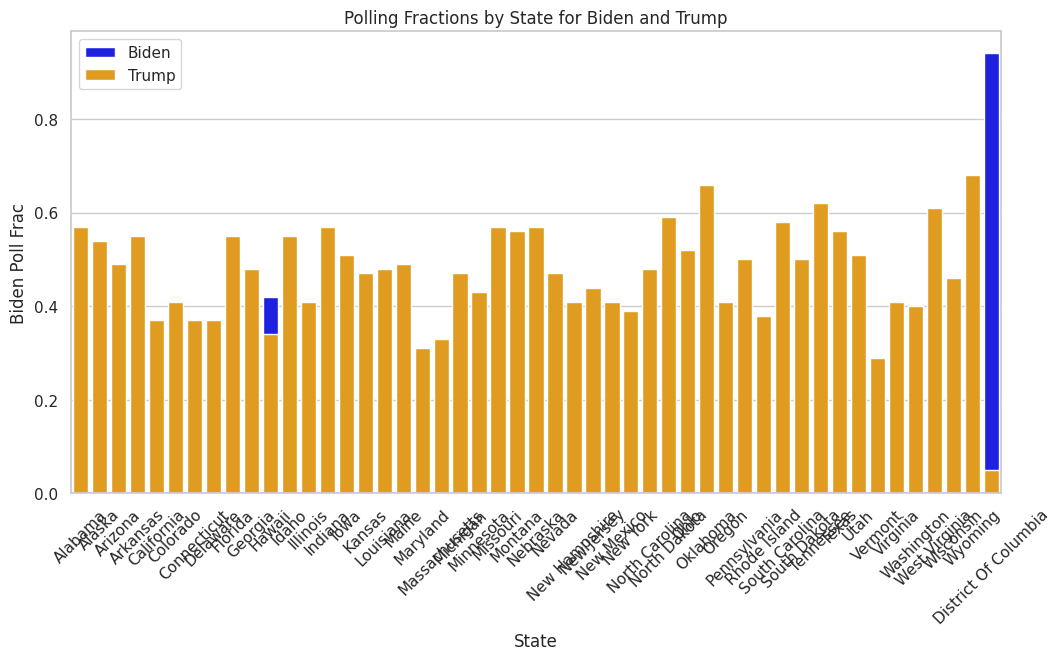

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Bar plot of poll fractions for Biden and Trump
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Biden Poll Frac', data=state_df, color='blue', label='Biden')
sns.barplot(x='State', y='Trump Poll Frac', data=state_df, color='orange', label='Trump')
plt.xticks(rotation=45)
plt.title('Polling Fractions by State for Biden and Trump')
plt.legend()
plt.show()


In [ ]:
joined = voting_df.merge(
    state_df,
    on='State',
    how='outer'
)

In [ ]:

joined['Sample Size'] = joined['Sample Size'].apply(lambda x: float(x))

In [ ]:
joined['exists_trump_harris_poll'] = joined.apply(lambda row: np.isnan(row['Trump Poll Frac']) == False and np.isnan(row['Harris Poll Frac']) == False, 1)
joined['exists_trump_biden_poll'] = joined.apply(lambda row: np.isnan(row['Trump Poll Frac']) == False and np.isnan(row['Biden Poll Frac']) == False, 1)

In [ ]:
joined = joined.fillna(0)

In [ ]:
#get the number of votes for each candidate in 2020
joined['N Votes'] = joined['Trump Votes'] + joined['Biden Votes']

In [ ]:
#get the fraction of votes for each candidate in 2020
joined['Biden Vote Frac'] = joined['Biden Votes'] / joined['N Votes']
joined['Trump Vote Frac'] = joined['Trump Votes'] / joined['N Votes']

In [ ]:
joined = joined.reset_index(drop=True)

In [ ]:
#rebalance the polls to assume it's a race between just Trump and Harris or Trump and Biden
joined['Poll Sum Frac'] = joined.apply(lambda row: np.nansum([row['Harris Poll Frac'], row['Trump Poll Frac'], row['Biden Poll Frac']]), 1)
joined['Harris Poll Frac'] = joined['Harris Poll Frac'] / joined['Poll Sum Frac']
joined['Trump Poll Frac'] = joined['Trump Poll Frac'] / joined['Poll Sum Frac']
joined['Biden Poll Frac'] = joined['Biden Poll Frac'] / joined['Poll Sum Frac']

In [ ]:
#from latest data here:
#https://projects.fivethirtyeight.com/polls/president-general/2024/national/
HARRIS_NATIONAL_POLL_FRAC = 0.481
TRUMP_NATIONAL_POLL_FRAC = 0.464

In [ ]:
joined

,State,Electoral Votes,Winner,Trump Votes,Biden Votes,Trump Electoral Votes,Biden Electoral Votes,Date,Sample Size,Pollster,Harris Poll Frac,Trump Poll Frac,Biden Poll Frac,exists_trump_harris_poll,exists_trump_biden_poll,N Votes,Biden Vote Frac,Trump Vote Frac,Poll Sum Frac
0,Alabama,9,Trump,1441170,849624,9,0,0,0.0,0,NaN,NaN,NaN,False,False,2290794,0.370886,0.629114,0.00
1,Alaska,3,Trump,189951,153778,3,0,Oct. 8-9,1254.0,Alaska Survey Research,0.460000,0.540000,0.000000,True,False,343729,0.447382,0.552618,1.00
2,Arizona,11,Biden,1661686,1672143,0,11,Oct. 19-20,800.0,InsiderAdvantage,0.484536,0.515464,0.000000,True,False,3333829,0.501568,0.498432,0.97
3,Arkansas,6,Trump,760647,423932,6,0,Sept. 5-6,696.0,Hendrix College,0.421053,0.578947,0.000000,True,False,1184579,0.357876,0.642124,0.95
4,California,55,Biden,6006429,11110250,0,55,Oct. 12-14,1000.0,Emerson College,0.622449,0.377551,0.000000,True,False,17116679,0.649089,0.350911,0.98
5,Colorado,9,Biden,1364607,1804352,0,9,Sept. 15-Oct. 19,400.0,ActiVote,0.590000,0.410000,0.000000,True,False,3168959,0.569383,0.430617,1.00
6,Connecticut,7,Biden,714717,1080831,0,7,Sept. 12-18,800.0,MassINC Polling Group,0.588889,0.411111,0.000000,True,False,1795548,0.601950,0.398050,0.90
7,Delaware,3,Biden,200603,296268,0,3,Sept. 19-21,500.0,Slingshot Strategies,0.593407,0.406593,0.000000,True,False,496871,0.596267,0.403733,0.91
8,District Of Columbia,3,Biden,18586,317323,0,3,Oct. 20-Nov. 2,495.0,SurveyMonkey,0.000000,0.050505,0.949495,False,True,335909,0.944670,0.055330,0.99
9,Florida,29,Trump,5668731,5297045,29,0,Oct. 7-20,400.0,ActiVote,0.450000,0.550000,0.000000,True,False,10965776,0.483052,0.516948,1.00


In [ ]:
def simulate_election(df, weight_vote, weight_poll, baseline_uncertainty=None, return_alphas_betas=False):

    #get indices for each logical polling situation
    exists_trump_harris_polling = df.exists_trump_harris_poll.values
    exists_trump_biden_polling = df.exists_trump_biden_poll.values
    not_exists_polling = (~exists_trump_harris_polling) & (~exists_trump_biden_polling)

    #if we're not encforcing uncertainty, use sample size as number of votes
    if baseline_uncertainty is None:
        n_votes_vals = df['N Votes']
    #otherwise, set sample size to allow uncertainty to be set at the given value
    #if no Trump/Harris poll for a state, but there is Trump/Biden poll, 1.5x the uncertainty
    #if no poll for a state, 2x the uncertainty
    else:
        n_votes_vals = 1/(4*baseline_uncertainty**2) - 3
        n_votes_missing_harris_polling_vals = 1/(4*(1.5*baseline_uncertainty)**2) - 3
        n_votes_missing_polling_vals = 1/(4*(2*baseline_uncertainty)**2) - 3

    #posterior alphas and betas for the Beta distribution of p(Harris) winning
    alphas = weight_vote * n_votes_vals * df['Biden Vote Frac'] + weight_poll * n_votes_vals * df['Harris Poll Frac'] + 1

    betas = weight_vote * n_votes_vals * df['Trump Vote Frac'] + weight_poll * n_votes_vals * df['Trump Poll Frac'] + 1

    #for states that do not have Trump/Harris polling but do have Trump/Biden polling
    alphas[exists_trump_biden_polling] = weight_vote * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Biden Vote Frac'] + weight_poll * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Biden Poll Frac'] + 1
    betas[exists_trump_biden_polling] = weight_vote * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Trump Vote Frac'] + weight_poll * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Trump Poll Frac'] + 1

    #for states that have no polling data at all
    alphas[not_exists_polling] = weight_vote * n_votes_missing_polling_vals * df.iloc[not_exists_polling]['Biden Vote Frac'] + weight_poll * n_votes_missing_polling_vals * HARRIS_NATIONAL_POLL_FRAC + 1
    betas[not_exists_polling] = weight_vote * n_votes_missing_polling_vals * df.iloc[not_exists_polling]['Trump Vote Frac'] + weight_poll * n_votes_missing_polling_vals * TRUMP_NATIONAL_POLL_FRAC + 1

    #using these alphas and betas, simulate the probability that Harris would win
    p_wins = [np.random.beta(a,b) for a,b in zip(alphas, betas)]
    harris_wins = np.array([p > 0.5 for p in p_wins])
    harris_evotes = df[harris_wins]['Electoral Votes'].sum()
    trump_evotes = df[~harris_wins]['Electoral Votes'].sum()

    if return_alphas_betas:
        return harris_evotes, trump_evotes, alphas, betas
    return harris_evotes, trump_evotes

In [ ]:
#number of simulations
n_sims = 100

In [ ]:
#set the baseline uncertainty (this should get lower as we get closer to election day)
BASELINE_UNCERTAINTY = 0.0050

In [ ]:
results = []
#iterate over several choice of voting and polling weights
for weight_vote in np.arange(0.01, 1.01, 0.01):
    weight_vote = round(weight_vote, 10)
    weight_poll = round(1-weight_vote, 10)
    if weight_poll < 0:
        continue

    print(weight_vote, weight_poll)
    #do n_sims simulations
    for _ in range(n_sims):
        harris_evotes, trump_evotes = simulate_election(joined, weight_vote, weight_poll, BASELINE_UNCERTAINTY)
        results.append([weight_vote, weight_poll, harris_evotes, trump_evotes])
results = pd.DataFrame(columns=['weight_vote', 'weight_poll', 'harris_evotes', 'trump_evotes'], data=results)

0.01 0.99
0.02 0.98
0.03 0.97
0.04 0.96
0.05 0.95
0.06 0.94
0.07 0.93
0.08 0.92
0.09 0.91
0.1 0.9
0.11 0.89
0.12 0.88
0.13 0.87
0.14 0.86
0.15 0.85
0.16 0.84
0.17 0.83
0.18 0.82
0.19 0.81
0.2 0.8
0.21 0.79
0.22 0.78
0.23 0.77
0.24 0.76
0.25 0.75
0.26 0.74
0.27 0.73
0.28 0.72
0.29 0.71
0.3 0.7
0.31 0.69
0.32 0.68
0.33 0.67
0.34 0.66
0.35 0.65
0.36 0.64
0.37 0.63
0.38 0.62
0.39 0.61
0.4 0.6
0.41 0.59
0.42 0.58
0.43 0.57
0.44 0.56
0.45 0.55
0.46 0.54
0.47 0.53
0.48 0.52
0.49 0.51
0.5 0.5
0.51 0.49
0.52 0.48
0.53 0.47
0.54 0.46
0.55 0.45
0.56 0.44
0.57 0.43
0.58 0.42
0.59 0.41
0.6 0.4
0.61 0.39
0.62 0.38
0.63 0.37
0.64 0.36
0.65 0.35
0.66 0.34
0.67 0.33
0.68 0.32
0.69 0.31
0.7 0.3
0.71 0.29
0.72 0.28
0.73 0.27
0.74 0.26
0.75 0.25
0.76 0.24
0.77 0.23
0.78 0.22
0.79 0.21
0.8 0.2
0.81 0.19
0.82 0.18
0.83 0.17
0.84 0.16
0.85 0.15
0.86 0.14
0.87 0.13
0.88 0.12
0.89 0.11
0.9 0.1
0.91 0.09
0.92 0.08
0.93 0.07
0.94 0.06
0.95 0.05
0.96 0.04
0.97 0.03
0.98 0.02
0.99 0.01
1.0 0.0


In [ ]:
results_agg = results.groupby(['weight_vote', 'weight_poll']).agg(
    harris_evotes_mean=('harris_evotes', 'mean'),
    trump_evotes_mean=('trump_evotes', 'mean'),
    harris_evotes_std=('harris_evotes', 'std'),
    trump_evotes_std=('trump_evotes', 'std')
).reset_index()


In [ ]:
#aggreate based on weight of polling data
stats = results.groupby(
    'weight_poll'
).agg(
    avg_harris_evotes = pd.NamedAgg('harris_evotes', np.mean),
    dev_harris_evotes = pd.NamedAgg('harris_evotes', np.std),
    avg_trump_evotes = pd.NamedAgg('trump_evotes', np.mean),
    dev_trump_evotes = pd.NamedAgg('trump_evotes', np.std),
).reset_index()

<ipython-input-34-3a6a4ad9cb67>:2: FutureWarning: The provided callable <function mean at 0x7d4b4a7f5000> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  stats = results.groupby(
<ipython-input-34-3a6a4ad9cb67>:2: FutureWarning: The provided callable <function std at 0x7d4b4a7f5120> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  stats = results.groupby(


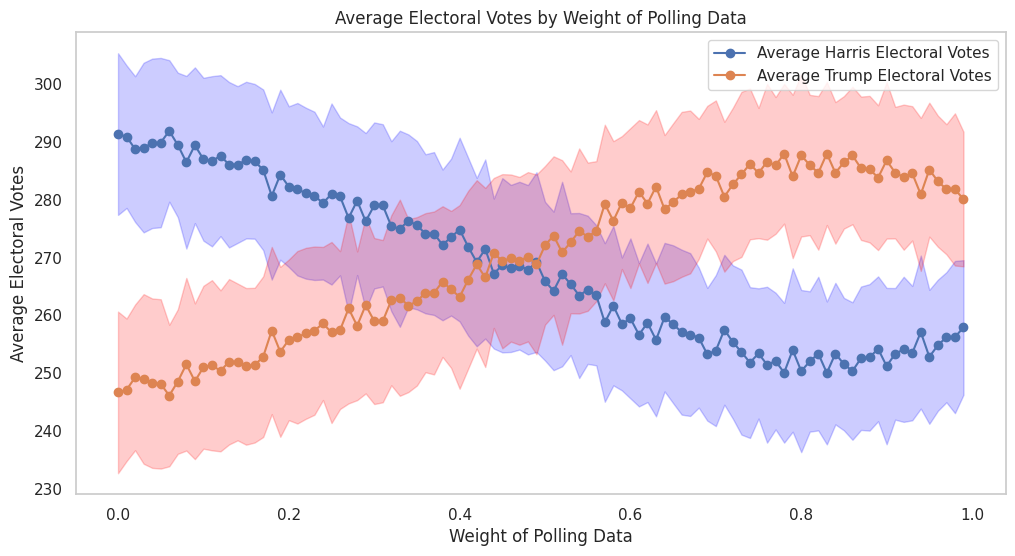

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(stats['weight_poll'], stats['avg_harris_evotes'], label='Average Harris Electoral Votes', marker='o')
plt.fill_between(stats['weight_poll'],
                 stats['avg_harris_evotes'] - stats['dev_harris_evotes'],
                 stats['avg_harris_evotes'] + stats['dev_harris_evotes'],
                 color='blue', alpha=0.2)

plt.plot(stats['weight_poll'], stats['avg_trump_evotes'], label='Average Trump Electoral Votes', marker='o')
plt.fill_between(stats['weight_poll'],
                 stats['avg_trump_evotes'] - stats['dev_trump_evotes'],
                 stats['avg_trump_evotes'] + stats['dev_trump_evotes'],
                 color='red', alpha=0.2)

plt.title("Average Electoral Votes by Weight of Polling Data")
plt.xlabel("Weight of Polling Data")
plt.ylabel("Average Electoral Votes")
plt.legend()
plt.grid()
plt.show()



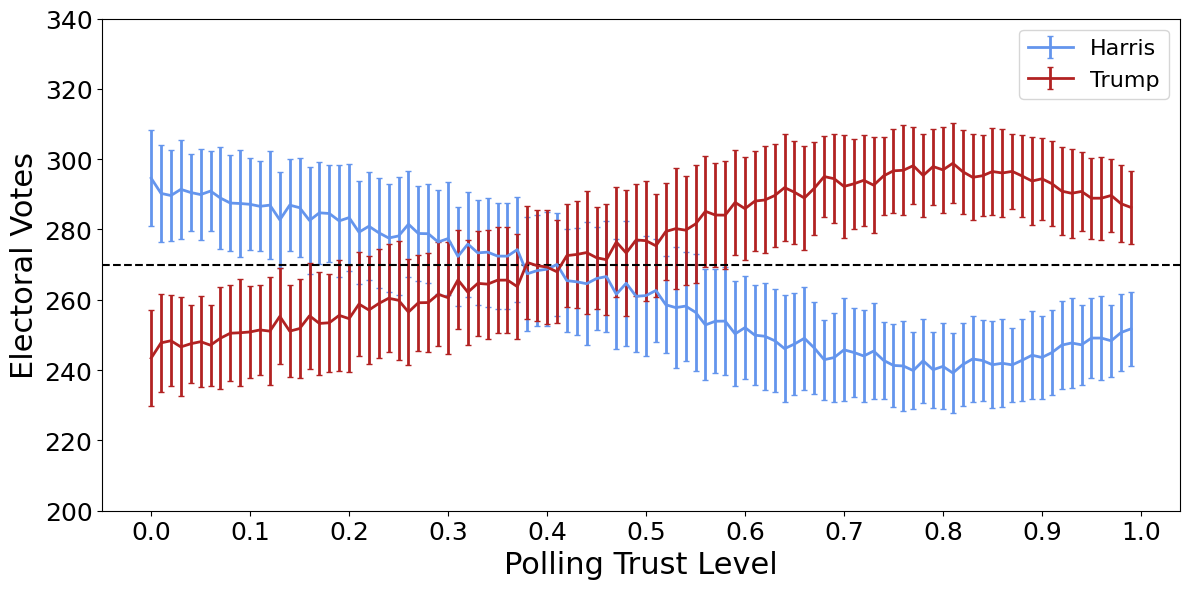

In [ ]:
plt.figure(figsize=(12,6))
plt.errorbar(stats.weight_poll, stats.avg_harris_evotes, yerr=stats.dev_harris_evotes, color='cornflowerblue', linewidth=2, capsize=2)
plt.errorbar(stats.weight_poll, stats.avg_trump_evotes, yerr=stats.dev_trump_evotes, color='firebrick', linewidth=2, capsize=2)
plt.legend(['Harris', 'Trump'], fontsize=16, loc=1)
plt.axhline(270, color='k', linestyle='--')
plt.ylim(200, 340)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=18)
plt.xlabel('Polling Trust Level', fontsize=22)
plt.yticks(np.arange(200, 350, 20), fontsize=18)
plt.ylabel('Electoral Votes', fontsize=22)
plt.tight_layout()
plt.savefig('election_simulations.png', dpi=250)

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
import pandas as pd

# Assuming 'stats' DataFrame is available after running simulations
# It should have columns like: weight_poll, avg_harris_evotes, dev_harris_evotes, avg_trump_evotes, dev_trump_evotes

# Create traces for Harris and Trump
trace_harris = go.Scatter(
    x=stats['weight_poll'],
    y=stats['avg_harris_evotes'],
    error_y=dict(type='data', array=stats['dev_harris_evotes']),
    mode='lines+markers',
    name='Harris',
    line=dict(color='cornflowerblue'),
    hovertemplate='Polling Trust Level: %{x}<br>Harris Electoral Votes: %{y}<extra></extra>'
)

trace_trump = go.Scatter(
    x=stats['weight_poll'],
    y=stats['avg_trump_evotes'],
    error_y=dict(type='data', array=stats['dev_trump_evotes']),
    mode='lines+markers',
    name='Trump',
    line=dict(color='firebrick'),
    hovertemplate='Polling Trust Level: %{x}<br>Trump Electoral Votes: %{y}<extra></extra>'
)

# Create a reference line for 270 electoral votes
trace_270 = go.Scatter(
    x=stats['weight_poll'],
    y=[270] * len(stats),  # Constant line at 270
    mode='lines',
    name='270 Electoral Votes',
    line=dict(color='black', dash='dash'),
    hoverinfo='skip'
)

# Create the layout
layout = go.Layout(
    title='Predicted Electoral Votes for Harris and Trump',
    xaxis=dict(title='Polling Trust Level'),
    yaxis=dict(title='Electoral Votes', range=[200, 340]),
    showlegend=True,
    hovermode='closest'
)

# Combine traces into a figure
fig = go.Figure(data=[trace_harris, trace_trump, trace_270], layout=layout)

# Save the figure as an HTML file
pio.write_html(fig, file='election_simulation_trend.html', auto_open=False)


In [ ]:
from google.colab import files
files.download('election_simulation_trend.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>